### Variable for dataset location
|              |                 |              |Dataset          |              |                 |
|--------------|-----------------|--------------|-----------------|--------------|-----------------|
|              |Train            |              |Validation       |              |Test             |
|blue_jellyfish|compass_jellyfish|blue_jellyfish|compass_jellyfish|blue_jellyfish|compass_jellyfish|
|01-33.jpg     |01-33.jpg        |34-44.jpg     |34-44.jpg        |45-55.jpg     |45-55.jpg        |

In [1]:
# train_dir = './dataset_blue_and_compass_jellyfish/train/'
# validation_dir = './dataset_blue_and_compass_jellyfish/validation/'
# test_dir = './dataset_blue_and_compass_jellyfish/test/'

train_dir = './dataset_cats_and_dogs/train/'
validation_dir = './dataset_cats_and_dogs/validation/'
test_dir = './dataset_cats_and_dogs/test/'

### Image data preprocessing
- ref link: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagerescale = ImageDataGenerator(rescale=1./255) ### RGB to convert 0,1
test_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1

train_imagedatagenerator = train_imagerescale.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size = 50,   ### Run 2000 images at a time of fit
    class_mode = 'binary'
)

validation_imagedatagenerator = test_imagerescale.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    batch_size = 50,   ### Run 1000 images at a time of fit
    class_mode = 'binary'
)

2023-11-01 08:45:43.718818: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: U

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Using 4 x Conv layers and then flat and add 1 x Dense layer
- ref link: https://www.tensorflow.org/api_docs/python/tf/keras/layers, https://www.tensorflow.org/api_docs/python/tf/keras/models

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=8, activation = 'relu', padding = 'same',
                        input_shape = [128, 128, 3]),)
model.add(layers.MaxPooling2D(
            # (2, 2) ### Image shape become (75 , 75)
            ))

model.add(layers.Conv2D(filters=64, kernel_size=5, activation = 'relu', padding = 'same')),
model.add(layers.MaxPooling2D(
            # (2, 2)  ### Image shape become (37.5 , 37.5)
            ))

model.add(layers.Conv2D(filters=128, kernel_size=3, activation = 'relu', padding = 'same')),
model.add(layers.MaxPooling2D(
            # (2, 2) ### Image shape become (18 , 18)
            ))

model.add(layers.Conv2D(filters=128, kernel_size=3, activation = 'relu', padding = 'same')),
model.add(layers.MaxPooling2D(
            # (2, 2) ### Image shape become (9, 9)
            ))

# model.add(layers.Conv2D(filters=512, kernel_size=8, activation = 'relu', padding = 'same')),
# model.add(layers.MaxPooling2D(
#             # (2, 2) ### Image shape become (4.5, 4.5)
#             ))

# model.add(layers.Conv2D(filters=512, kernel_size=8, activation = 'relu', padding = 'same')),
# model.add(layers.MaxPooling2D(
#             # (2, 2) ### Image shape become (2, 2)
#             ))

model.add(layers.Flatten())
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

2023-11-01 08:45:57.233726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 08:45:58.453655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 08:45:58.455672: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      6176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

### Compiling the model

In [4]:
from tensorflow.keras import optimizers

model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['binary_accuracy']
)

# model.compile(
#     optimizer=optimizers.RMSprop(learning_rate=0.2),
#     loss='binary_crossentropy',
#     metrics=['binary_accuracy'],
# )

### fitting  model
- ref link: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [5]:
history = model.fit(
    train_imagedatagenerator,
    steps_per_epoch = 40, ### our batch size is 11 and total images are 22 for train data
    validation_data=validation_imagedatagenerator,
    validation_steps= 20, ### our batch size is 11 and total images are 66 for validation data
    epochs=10,
)

Epoch 1/10


2023-11-01 08:46:05.190717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-11-01 08:46:15.219538: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-11-01 08:46:23.383713: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55755ae63d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-01 08:46:23.383769: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-11-01 08:46:23.686340: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-01 08:46:24.516854: I ./tensor

40/40 [==============================] - ETA: 0s - loss: 0.6927 - binary_accuracy: 0.5015

2023-11-01 08:46:36.344458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - 34s 226ms/step - loss: 0.6927 - binary_accuracy: 0.5015 - val_loss: 0.6919 - val_binary_accuracy: 0.5500
Epoch 2/10
40/40 [==============================] - 4s 111ms/step - loss: 0.6913 - binary_accuracy: 0.5360 - val_loss: 0.6910 - val_binary_accuracy: 0.5620
Epoch 3/10
40/40 [==============================] - 5s 113ms/step - loss: 0.6909 - binary_accuracy: 0.5275 - val_loss: 0.6899 - val_binary_accuracy: 0.5340
Epoch 4/10
40/40 [==============================] - 5s 112ms/step - loss: 0.6877 - binary_accuracy: 0.5695 - val_loss: 0.6871 - val_binary_accuracy: 0.5490
Epoch 5/10
40/40 [==============================] - 5s 115ms/step - loss: 0.6838 - binary_accuracy: 0.5580 - val_loss: 0.6855 - val_binary_accuracy: 0.5410
Epoch 6/10
40/40 [==============================] - 5s 115ms/step - loss: 0.6771 - binary_accuracy: 0.5760 - val_loss: 0.6785 - val_binary_accuracy: 0.5700
Epoch 7/10
40/40 [==============================] - 5s 121ms/step - loss: 

### data plotting

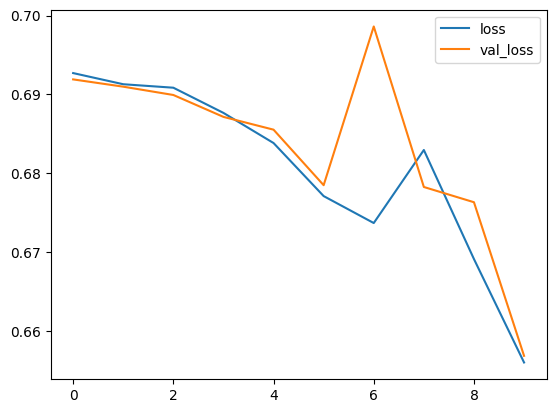

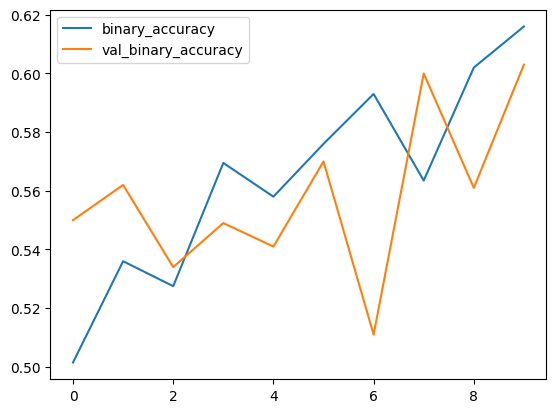

In [6]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

### Using Data Augmentation as above graph is showing overfitting (loss < val_loss and accuracy > val_accuracy)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagerescale = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)
traing_imagedatagenerator = train_imagerescale.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    # batch_size=11,
    class_mode='binary'
)

test_imagerescale = ImageDataGenerator(rescale=1./255)
validation_imagedatagenerator = test_imagerescale.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    # batch_size=11,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=8, activation = 'relu', padding = 'same',
                        input_shape = [128, 128, 3]),)
model.add(layers.MaxPooling2D(
            # (2, 2) ### Image shape become (75 , 75)
            ))

model.add(layers.Conv2D(filters=64, kernel_size=5, activation = 'relu', padding = 'same')),
model.add(layers.MaxPooling2D(
            # (2, 2)  ### Image shape become (37.5 , 37.5)
            ))

model.add(layers.Conv2D(filters=128, kernel_size=3, activation = 'relu', padding = 'same')),
model.add(layers.MaxPooling2D(
            # (2, 2) ### Image shape become (18 , 18)
            ))

model.add(layers.Conv2D(filters=128, kernel_size=3, activation = 'relu', padding = 'same')),
model.add(layers.MaxPooling2D(
            # (2, 2) ### Image shape become (9, 9)
            ))

# model.add(layers.Conv2D(filters=512, kernel_size=8, activation = 'relu', padding = 'same')),
# model.add(layers.MaxPooling2D(
#             # (2, 2) ### Image shape become (4.5, 4.5)
#             ))

# model.add(layers.Conv2D(filters=512, kernel_size=8, activation = 'relu', padding = 'same')),
# model.add(layers.MaxPooling2D(
#             # (2, 2) ### Image shape become (2, 2)
#             ))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      6176      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 128)     

In [14]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.02),
    metrics = ['binary_accuracy']
)

In [15]:
history = model.fit(
    train_imagedatagenerator,
    #steps_per_epoch = 2, ### our batch size is 11 and total images are 22 for train data
    validation_data=validation_imagedatagenerator,
    #validation_steps= 6, ### our batch size is 11 and total images are 66 for validation data
    epochs=10,
)

Epoch 1/10


2023-11-01 08:48:42.760924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - ETA: 0s - loss: 0.6937 - binary_accuracy: 0.4900

2023-11-01 08:48:48.438900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - 7s 115ms/step - loss: 0.6937 - binary_accuracy: 0.4900 - val_loss: 0.6925 - val_binary_accuracy: 0.4930
Epoch 2/10
40/40 [==============================] - 5s 114ms/step - loss: 0.6924 - binary_accuracy: 0.5045 - val_loss: 0.6913 - val_binary_accuracy: 0.5240
Epoch 3/10
40/40 [==============================] - 4s 110ms/step - loss: 0.6912 - binary_accuracy: 0.5215 - val_loss: 0.6900 - val_binary_accuracy: 0.5360
Epoch 4/10
40/40 [==============================] - 5s 116ms/step - loss: 0.6900 - binary_accuracy: 0.5430 - val_loss: 0.6885 - val_binary_accuracy: 0.5700
Epoch 5/10
40/40 [==============================] - 4s 110ms/step - loss: 0.6876 - binary_accuracy: 0.5425 - val_loss: 0.6866 - val_binary_accuracy: 0.5370
Epoch 6/10
40/40 [==============================] - 5s 113ms/step - loss: 0.6846 - binary_accuracy: 0.5610 - val_loss: 0.6843 - val_binary_accuracy: 0.5680
Epoch 7/10
40/40 [==============================] - 5s 112ms/step - loss: 0

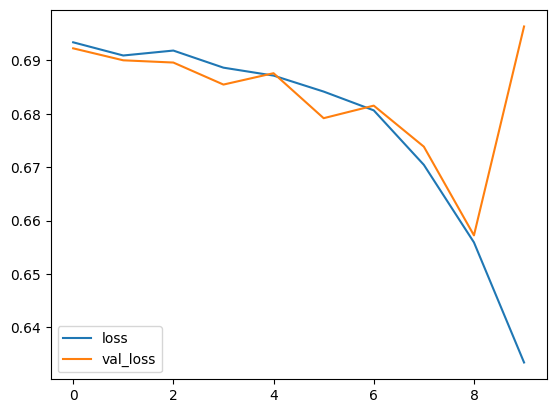

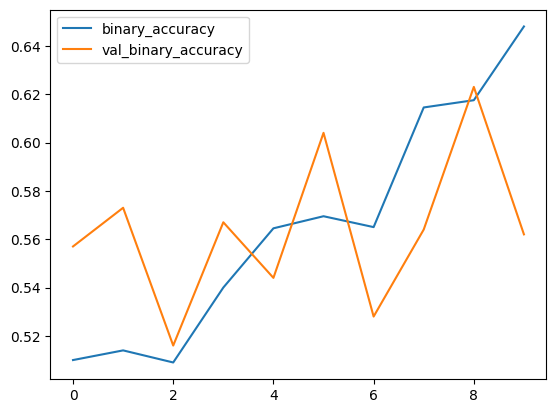

In [11]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# pd.DataFrame(history.history)plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0,1)
# plt.show()

In [12]:
model.save('cat_dog_20231101_01.keras')